##Cost and Insurance Analysis of Patient Visit Demo Dataset Part I

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_visit = pd.read_csv("/content/demo_hospital_outpatient_data_clean.zip")
df_visit.head()

Visit_Date  Patient_ID  Age  Gender                          Diagnosis  \
0  2020-05-06      688923   68  Female                           Diabetes   
1  2018-08-04      886361   62  Female            Urinary Tract Infection   
2  2021-04-10      464823   70  Female  Upper Respiratory Tract Infection   
3  2021-10-01      655214    8  Female  Upper Respiratory Tract Infection   
4  2018-04-30      454666   24    Male                            Malaria   

   Has_Insurance  Postcode  Total_Cost  Registration(minutes)  \
0           True     20006      2274.0                   33.0   
1          False     20005      3430.0                   46.0   
2           True     10003      1836.0                  107.0   
3          False     10006      3250.0                   66.0   
4           True     10006      2262.0                   68.0   

   Nursing(minutes)  Laboratory(minutes)  Consultation(minutes)  \
0             105.0                101.0                   28.0   
1              75.0                 84.0                  102.0   
2              81.0                  5.0                   77.0   
3              31.0                101.0                   35.0   
4              55.0                 60.0                   90.0   

   Pharmacy(minutes)  
0              112.0  
1               36.0  
2               36.0  
3               92.0  
4              104.0

In [3]:
avg_cost_by_gender = df_visit.groupby('Gender')['Total_Cost'].mean()
avg_cost_by_gender

Gender
Female    2632.877112
Male      2618.993034
Name: Total_Cost, dtype: float64

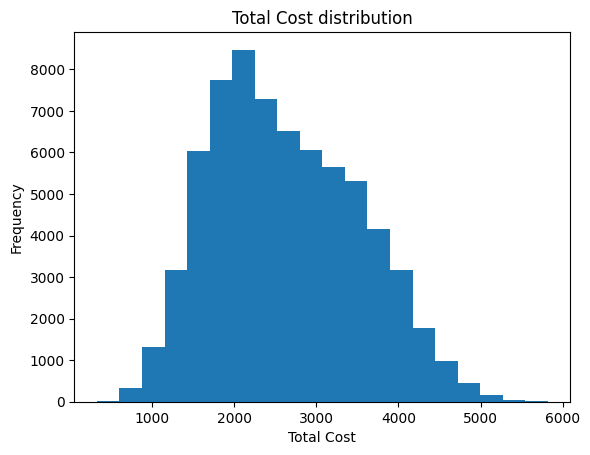

In [4]:
plt.hist(df_visit['Total_Cost'], bins=20)
plt.title('Total Cost distribution')
plt.xlabel('Total Cost')
plt.ylabel("Frequency")
plt.show()

In [5]:
avg_cost_by_insurance = df_visit[df_visit['Has_Insurance'] == True]['Total_Cost'].mean()
avg_cost_by_insurance

1876.0660470202297

In [6]:
avg_cost_without_insurance = df_visit[df_visit['Has_Insurance'] == False]['Total_Cost'].mean()
avg_cost_without_insurance

3125.477213683929

In [7]:
df_visit['Visit_Date'] = pd.to_datetime(df_visit['Visit_Date'])
df_visit.set_index("Visit_Date", inplace=True)
annual_total_cost = df_visit['Total_Cost'].resample("Y").sum()

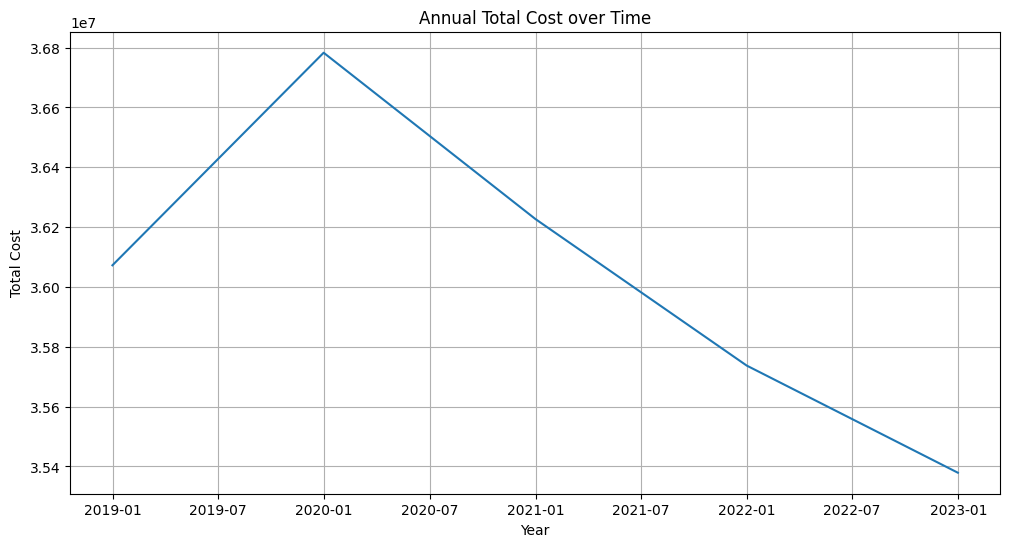

In [8]:
plt.figure(figsize=(12,6))
plt.plot(annual_total_cost.index, annual_total_cost.values)
plt.title("Annual Total Cost over Time")
plt.xlabel("Year")
plt.ylabel("Total Cost")
plt.grid(True)
plt.show()

##Cost and Insurance Analysis of Patient Visit Demo Dataset Part II

In [13]:
df_visit = df_visit.reset_index()

In [14]:
df_visit.set_index('Visit_Date', inplace=True)
df_visit.head()

Patient_ID  Age  Gender                          Diagnosis  \
Visit_Date                                                               
2020-05-06      688923   68  Female                           Diabetes   
2018-08-04      886361   62  Female            Urinary Tract Infection   
2021-04-10      464823   70  Female  Upper Respiratory Tract Infection   
2021-10-01      655214    8  Female  Upper Respiratory Tract Infection   
2018-04-30      454666   24    Male                            Malaria   

            Has_Insurance  Postcode  Total_Cost  Registration(minutes)  \
Visit_Date                                                               
2020-05-06           True     20006      2274.0                   33.0   
2018-08-04          False     20005      3430.0                   46.0   
2021-04-10           True     10003      1836.0                  107.0   
2021-10-01          False     10006      3250.0                   66.0   
2018-04-30           True     10006      2262.0                   68.0   

            Nursing(minutes)  Laboratory(minutes)  Consultation(minutes)  \
Visit_Date                                                                 
2020-05-06             105.0                101.0                   28.0   
2018-08-04              75.0                 84.0                  102.0   
2021-04-10              81.0                  5.0                   77.0   
2021-10-01              31.0                101.0                   35.0   
2018-04-30              55.0                 60.0                   90.0   

            Pharmacy(minutes)  
Visit_Date                     
2020-05-06              112.0  
2018-08-04               36.0  
2021-04-10               36.0  
2021-10-01               92.0  
2018-04-30              104.0

In [15]:
has_insurance_true_data = df_visit[df_visit['Has_Insurance'] == True]['Total_Cost'].resample('Y').sum()
has_insurance_false_data = df_visit[df_visit['Has_Insurance'] == False]['Total_Cost'].resample('Y').sum()

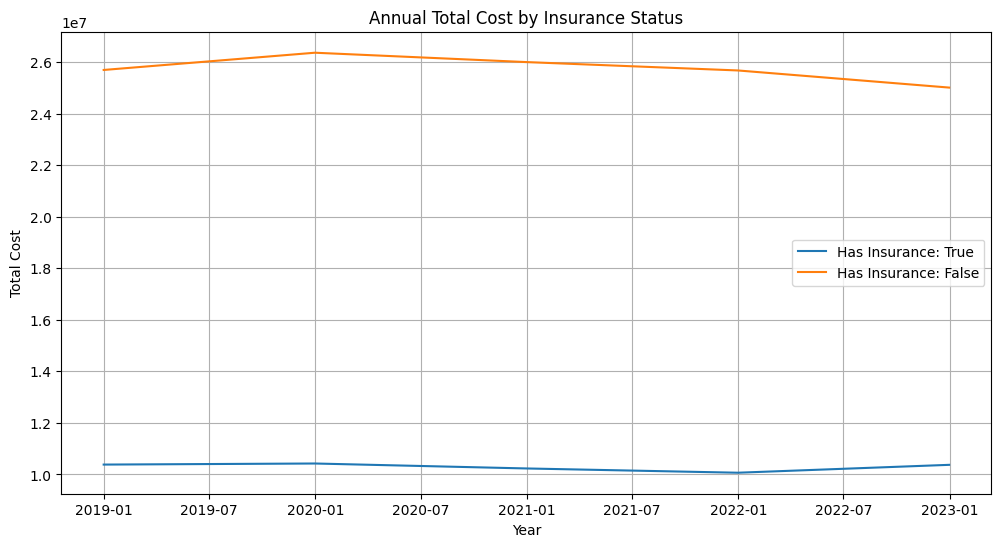

In [16]:
plt.figure(figsize=(12,6))
plt.plot(has_insurance_true_data.index, has_insurance_true_data.values,label='Has Insurance: True')
plt.plot(has_insurance_false_data.index, has_insurance_false_data.values,label='Has Insurance: False')
plt.title('Annual Total Cost by Insurance Status')
plt.xlabel('Year')
plt.ylabel('Total Cost')
plt.grid(True)
plt.legend()
plt.show()